In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

dataset\corrected.gz
dataset\kddcup.data.corrected
dataset\kddcup.data.gz
dataset\kddcup.data_10_percent.gz
dataset\kddcup.data_10_percent_corrected
dataset\kddcup.names
dataset\kddcup.newtestdata_10_percent_unlabeled.gz
dataset\kddcup.testdata.unlabeled.gz
dataset\kddcup.testdata.unlabeled_10_percent.gz
dataset\training_attack_types
dataset\typo-correction.txt
dataset\corrected\corrected
dataset\kddcup.data\kddcup.data
dataset\kddcup.data_10_percent\kddcup.data_10_percent
dataset\kddcup.newtestdata_10_percent_unlabeled\kddcup.newtestdata_10_percent_unlabeled
dataset\kddcup.testdata.unlabeled\kddcup.testdata.unlabeled
dataset\kddcup.testdata.unlabeled_10_percent\kddcup.testdata.unlabeled_10_percent


In [2]:
#Importing The Required Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [3]:
#Finding what type of files are there in this kdd-cup-1999-data
print(os.listdir('dataset/kddcup.data'))

['kddcup.data']


In [4]:
#opening the file kddcup.names
with open("dataset/kddcup.names",'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [5]:
#Taking all the columns into a list
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [6]:
#opening what type of attacks are availble  in training_attack_types file
with open("dataset/training_attack_types",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [7]:
#taking these attack types into a dictionary
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [8]:
#Reading The Dataset
path = "dataset/kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [9]:
#Finding the Shape of the DataSet
df.shape


(494021, 43)

In [10]:
#finding the count of each type of attacks in target column
df['target'].value_counts()


target
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64

In [11]:
#finding the count of each category of attacks in Attack Type Column
df['Attack Type'].value_counts()


Attack Type
dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: count, dtype: int64

In [12]:
#find the data types of each column
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

DATA PREPROCESSING


In [13]:
#finding missing values in each column and counting their number
df.isnull().sum()


duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [14]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['protocol_type', 'service', 'flag']

CATEGORICAL FEATURES DISTRIBUTION

In [15]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

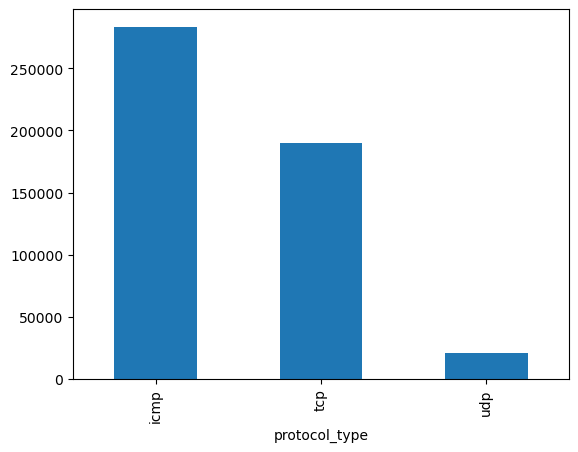

In [16]:
bar_graph('protocol_type')


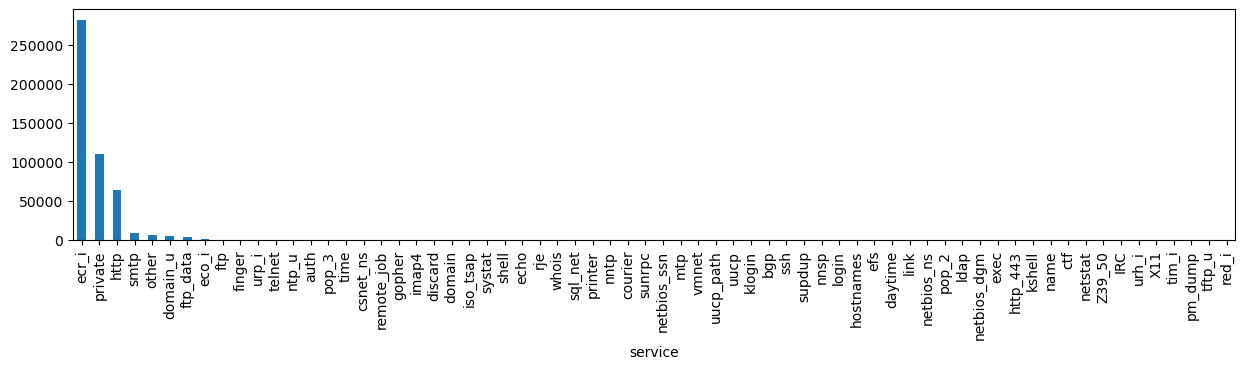

In [17]:
plt.figure(figsize=(15,3))
bar_graph('service')

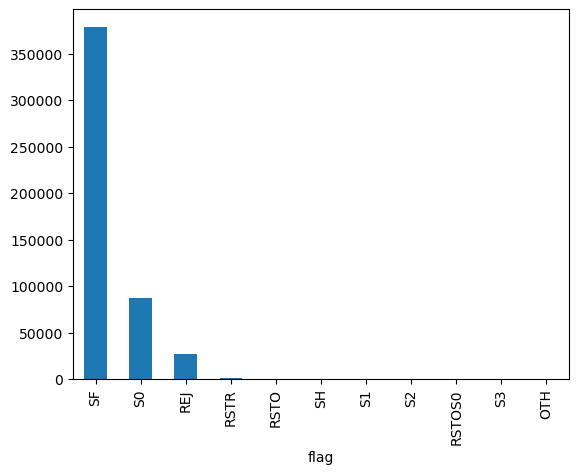

In [18]:
bar_graph('flag')


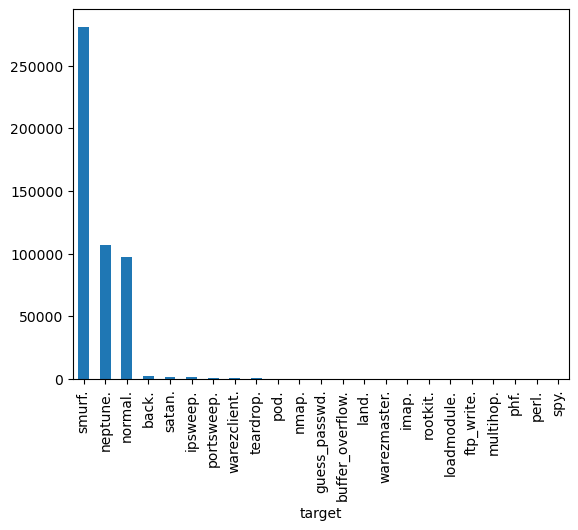

In [19]:
bar_graph('target')


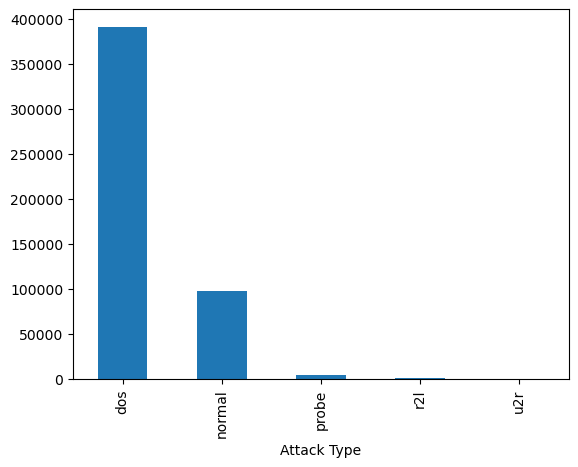

In [20]:
bar_graph('Attack Type')


In [21]:
df.columns


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

In [22]:
df=df.drop_duplicates()

In [23]:
df.shape

(145586, 43)

In [24]:
df.columns


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

DATA CORRELATION


In [25]:
df = df.dropna(axis='columns')  # drop columns with NaN
df.shape

(145586, 43)

In [26]:
df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values
df.shape

(145586, 41)

In [27]:
corr = df.corr(numeric_only=True)
corr

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.004280,0.002582,-0.001264,-0.009102,0.003707,0.009855,0.004343,-0.090667,0.061454,...,0.062703,-0.116824,-0.120372,0.429391,0.353500,-0.028847,-0.067714,-0.067908,-0.003710,0.002456
src_bytes,0.004280,1.000000,-0.000162,-0.000051,-0.000365,-0.000018,0.003999,-0.000077,-0.000928,0.000025,...,-0.000117,-0.003937,-0.002144,0.000138,0.005619,0.000760,-0.001742,0.001111,-0.001092,0.001327
dst_bytes,0.002582,-0.000162,1.000000,-0.000551,-0.003969,0.016147,0.000658,0.048789,0.028106,0.022755,...,-0.034975,0.013327,0.031658,-0.016820,0.028689,0.001728,-0.028956,-0.028726,-0.014865,-0.015282
land,-0.001264,-0.000051,-0.000551,1.000000,-0.000989,-0.000056,-0.000823,-0.000211,-0.011524,-0.000093,...,-0.021110,-0.012802,0.007972,-0.002662,0.037464,0.106807,0.015462,0.008634,-0.003981,-0.004149
wrong_fragment,-0.009102,-0.000365,-0.003969,-0.000989,1.000000,-0.000400,-0.005925,-0.001521,-0.082969,-0.000667,...,0.039512,-0.051512,-0.051003,0.085303,0.064637,-0.009676,-0.049449,-0.054156,0.029722,-0.029870
urgent,0.003707,-0.000018,0.016147,-0.000056,-0.000400,1.000000,0.000142,0.141954,0.004818,0.014268,...,-0.006155,-0.005306,-0.003356,0.013441,0.002639,-0.001494,-0.003053,-0.003040,-0.001709,-0.001677
hot,0.009855,0.003999,0.000658,-0.000823,-0.005925,0.000142,1.000000,0.007997,0.070770,0.003533,...,0.001460,-0.037461,-0.024315,-0.010235,-0.018591,-0.018850,-0.043728,-0.044732,-0.020471,-0.021826
num_failed_logins,0.004343,-0.000077,0.048789,-0.000211,-0.001521,0.141954,0.007997,1.000000,-0.013872,0.006824,...,-0.021350,-0.017022,0.008763,-0.002344,0.002878,0.016871,-0.007588,-0.008348,0.031271,0.029892
logged_in,-0.090667,-0.000928,0.028106,-0.011524,-0.082969,0.004818,0.070770,-0.013872,1.000000,0.008041,...,-0.473362,0.759839,0.769697,-0.308657,-0.095760,0.033620,-0.627963,-0.627838,-0.331083,-0.320664
num_compromised,0.061454,0.000025,0.022755,-0.000093,-0.000667,0.014268,0.003533,0.006824,0.008041,1.000000,...,-0.006565,-0.005592,-0.002194,-0.000609,-0.001620,-0.000536,-0.004086,-0.003538,-0.002371,-0.002377


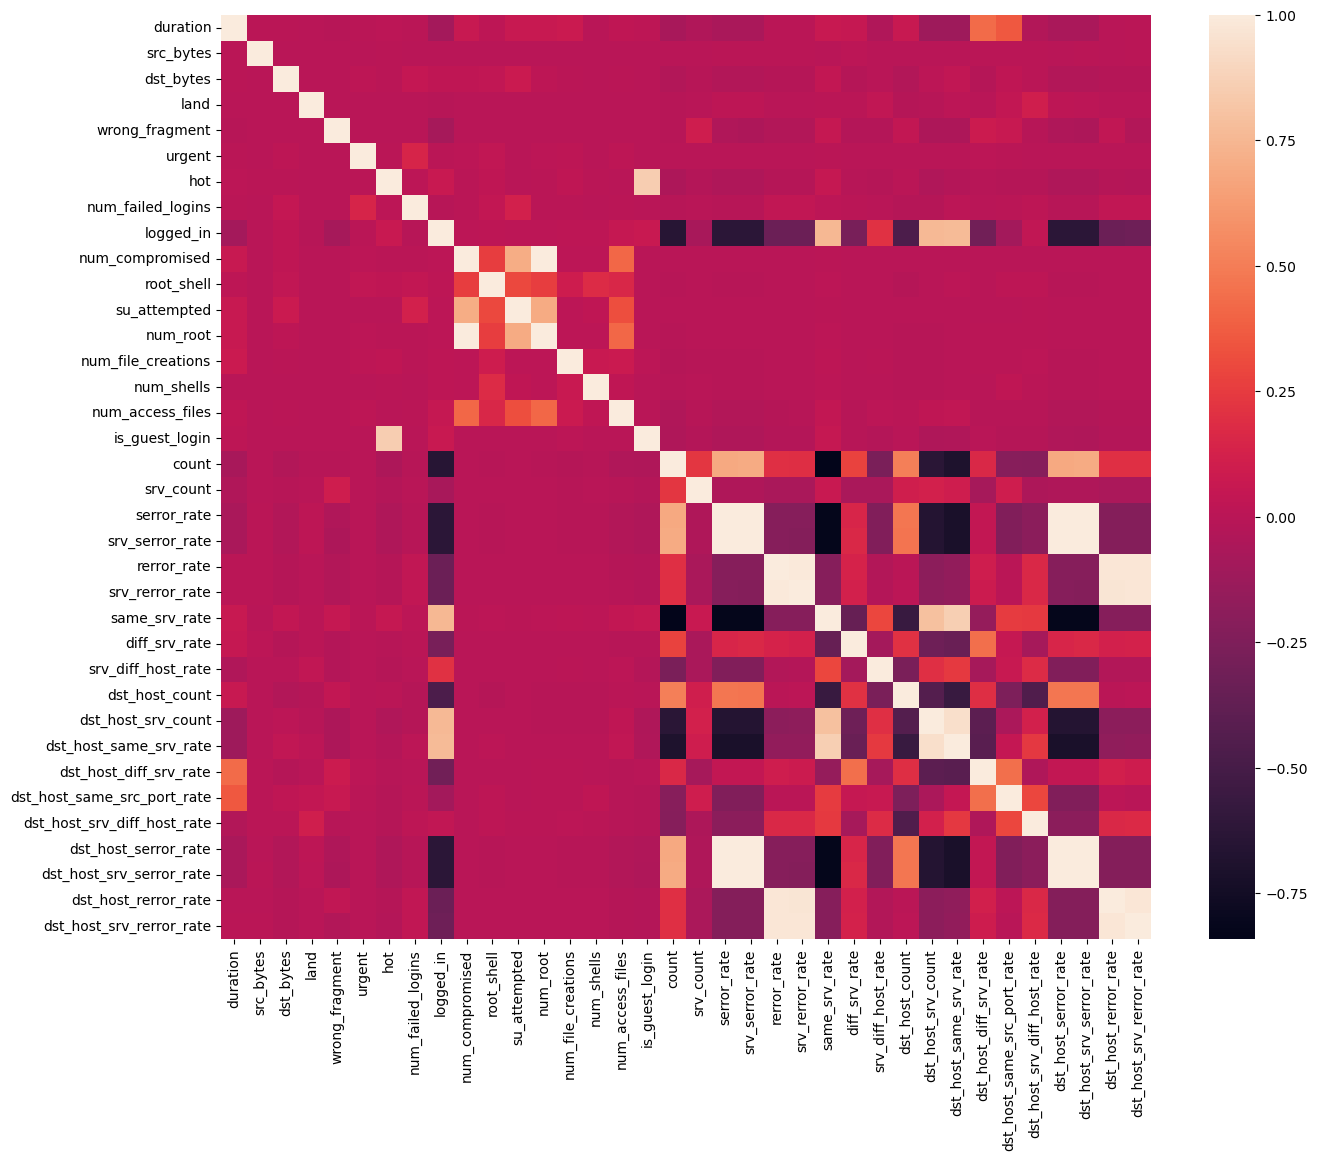

In [28]:
plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [29]:
df['num_root'].corr(df['num_compromised'])


0.9942146069064378

In [30]:
df['srv_serror_rate'].corr(df['serror_rate'])


0.9963627548287071

In [31]:
df['srv_rerror_rate'].corr(df['rerror_rate'])


0.9913169525713

In [32]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])


0.9365191648908961

In [33]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])


0.9958977350060624

In [34]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])


0.9715011333749494

In [35]:
df['dst_host_serror_rate'].corr(df['serror_rate'])


0.9968427313716615

In [36]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])


0.9951224321913429

In [37]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])


0.9951521034735541

In [38]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])


0.9983509795964974

In [39]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])


0.9755139232818264

In [40]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])


0.9673749564724619

In [41]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])


0.9726142096063956

In [42]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])


0.9751047687985961

In [43]:
#Dropping columns which are having high correlation coefficient
df.drop('num_root',axis = 1,inplace = True)
df.drop('srv_serror_rate',axis = 1,inplace = True)
df.drop('srv_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)


In [44]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [45]:
df.columns


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

Feature  Mapping


In [46]:
df['protocol_type'].value_counts()


protocol_type
tcp     130913
udp      12267
icmp      2406
Name: count, dtype: int64

In [47]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [48]:
df['flag'].value_counts()


flag
SF        87459
S0        42278
REJ       14712
RSTO        569
RSTR        425
S1           57
SH           34
S2           24
RSTOS0       11
S3           10
OTH           7
Name: count, dtype: int64

In [49]:
#feature encoding
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [50]:
df['service'].value_counts()


service
http        62054
private     49057
smtp         9721
domain_u     5425
other        4769
            ...  
X11            11
tim_i           5
pm_dump         1
tftp_u          1
red_i           1
Name: count, Length: 66, dtype: int64

In [51]:
#since 66 services are there i am droping this column
df.drop('service',axis = 1,inplace= True)


In [52]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [53]:
df.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count           

Modelling

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [55]:
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(145586, 31)
(97542, 30) (48044, 30)
(97542, 1) (48044, 1)


Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier


In [57]:
model1 = RandomForestClassifier(n_estimators=30)


In [58]:
start_time = time.time()
model1.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [59]:
print("Training time: ",end_time-start_time)

Training time:  3.224733591079712


In [60]:
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()

In [61]:
print("Testing time: ",end_time-start_time)

Testing time:  0.18632817268371582


In [62]:
print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:",model1.score(X_test,Y_test))

Train score is: 0.9999692440179615
Test score is: 0.9991049870951628


Support Vector Machine


In [63]:
from sklearn.svm import SVC


In [64]:
model2 = SVC(gamma = 'scale')


In [65]:
start_time = time.time()
model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [66]:
print("Training time: ",end_time-start_time)


Training time:  218.72739434242249


In [67]:
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()

In [68]:
print("Testing time: ",end_time-start_time)


Testing time:  17.099075317382812


In [69]:
print("Train score is:", model2.score(X_train, Y_train))
print("Test score is:", model2.score(X_test,Y_test))

Train score is: 0.9959812183469685
Test score is: 0.996274248605445


Decision Trees

In [70]:
from sklearn.tree import DecisionTreeClassifier


In [71]:
model3 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)


In [72]:
start_time = time.time()
model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [73]:
print("Training time: ",end_time-start_time)


Training time:  0.37457776069641113


In [74]:
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()

In [75]:
print("Testing time: ",end_time-start_time)


Testing time:  0.009319543838500977


In [76]:
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))

Train score is: 0.9780094728424679
Test score is: 0.9779368911830821


Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)


In [78]:
start_time = time.time()
model4.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time:", end_time - start_time)


Training time: 4.664112567901611


In [79]:
start_time = time.time()
Y_test_pred4 = model4.predict(X_test)
end_time = time.time()
print("Testing time:", end_time - start_time)

Testing time: 0.008469581604003906


In [80]:
print("Train score:", model4.score(X_train, Y_train))
print("Test score:", model4.score(X_test, Y_test))

Train score: 0.9858112402862357
Test score: 0.9853051369577887


Evaluation Metrics

In [81]:
#for model 1-Random Forest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

#Confusion Matrix
confusion_mat=confusion_matrix(Y_test, Y_test_pred1)
print("Confusion Matrix: ")
print(confusion_mat)
print()

# Calculate accuracy
accuracy1 = accuracy_score(Y_test, Y_test_pred1)
print("Accuracy:", accuracy1)
print()

# Calculate precision
precision1 = precision_score(Y_test, Y_test_pred1, average='macro')
print("Precision:", precision1)
print()

# Calculate recall
recall1 = recall_score(Y_test, Y_test_pred1, average='macro')
print("Recall:", recall1)
print()

# Calculate F1 score
f11 = f1_score(Y_test, Y_test_pred1, average='macro')
print("F1 Score:", f11)


Confusion Matrix: 
[[17937     1     0     0     0]
 [    0 29047     9     4     0]
 [    0    13   711     0     0]
 [    0    10     0   301     0]
 [    0     6     0     0     5]]

Accuracy: 0.9991049870951628

Precision: 0.9946707005198746

Recall: 0.8807864429439569

F1 Score: 0.9172539526793179


In [82]:
#for model 2-Support Vector Machine

#Confusion Matrix
confusion_mat=confusion_matrix(Y_test, Y_test_pred2)
print("Confusion Matrix: ")
print(confusion_mat)
print()

# Calculate accuracy
accuracy2 = accuracy_score(Y_test, Y_test_pred2)
print("Accuracy:", accuracy2)
print()

# Calculate precision
precision2 = precision_score(Y_test, Y_test_pred2, average='macro')
print("Precision:", precision2)
print()

# Calculate recall
recall2 = recall_score(Y_test, Y_test_pred2, average='macro')
print("Recall:", recall2)
print()

# Calculate F1 score
f12 = f1_score(Y_test, Y_test_pred2, average='macro')
print("F1 Score:", f12)
print()

Confusion Matrix: 
[[17907    31     0     0     0]
 [   13 29003     8    35     1]
 [    1    51   672     0     0]
 [    1    31     0   279     0]
 [    0     3     0     4     4]]

Accuracy: 0.996274248605445

Precision: 0.9321546342476383

Recall: 0.8370459269333195

F1 Score: 0.8680262051905684



In [83]:
#for model 3-Decision Tree

#Confusion Matrix
confusion_mat=confusion_matrix(Y_test, Y_test_pred3)
print("Confusion Matrix: ")
print(confusion_mat)
print()

# Calculate accuracy
accuracy3 = accuracy_score(Y_test, Y_test_pred3)
print("Accuracy:", accuracy3)
print()

# Calculate precision
precision3 = precision_score(Y_test, Y_test_pred3, average='macro', zero_division=0)
print("Precision:", precision3)
print()

# Calculate recall
recall3 = recall_score(Y_test, Y_test_pred3, average='macro')
print("Recall:", recall3)
print()

# Calculate F1 score
f13 = f1_score(Y_test, Y_test_pred3, average='macro')
print("F1 Score:", f13)

Confusion Matrix: 
[[17707   231     0     0     0]
 [   51 29009     0     0     0]
 [   15   441   268     0     0]
 [    0   311     0     0     0]
 [    0    11     0     0     0]]

Accuracy: 0.9779368911830821

Precision: 0.5926312963332223

Recall: 0.47110661327186587

F1 Score: 0.5028625687182838


In [84]:
#for model 4-Logistic Regression

#Confusion Matrix
confusion_mat=confusion_matrix(Y_test, Y_test_pred4)
print("Confusion Matrix: ")
print(confusion_mat)
print()

# Calculate accuracy
accuracy4 = accuracy_score(Y_test, Y_test_pred4)
print("Accuracy:", accuracy4)
print()

# Calculate precision
precision4= precision_score(Y_test, Y_test_pred4, average='macro')
print("Precision:", precision4)
print()

# Calculate recall
recall4 = recall_score(Y_test, Y_test_pred4, average='macro')
print("Recall:", recall4)
print()

# Calculate F1 score
f14 = f1_score(Y_test, Y_test_pred4, average='macro')
print("F1 Score:", f14)

Confusion Matrix: 
[[17559   372     5     2     0]
 [   43 28964    12    40     1]
 [   10   157   557     0     0]
 [    1    55     1   254     0]
 [    1     3     0     3     4]]

Accuracy: 0.9853051369577887

Precision: 0.9190414999516697

Recall: 0.7850523593097436

F1 Score: 0.833301813561009


Perfomance Visualization


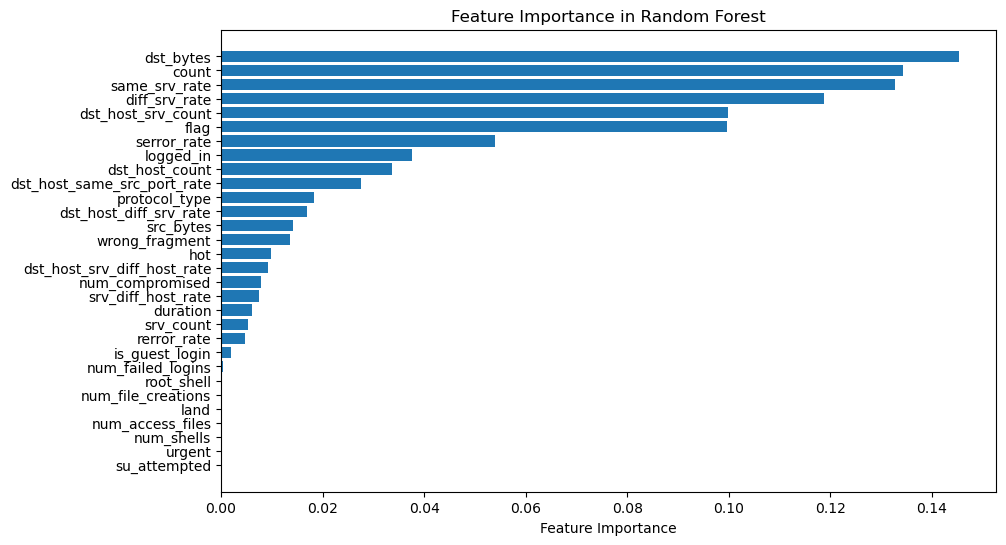

In [85]:
importances = model1.feature_importances_
sorted_indices = importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align="center")
plt.yticks(range(len(sorted_indices)), df.columns[:-1][sorted_indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest")
plt.show()


In [86]:
import matplotlib.pyplot as plt


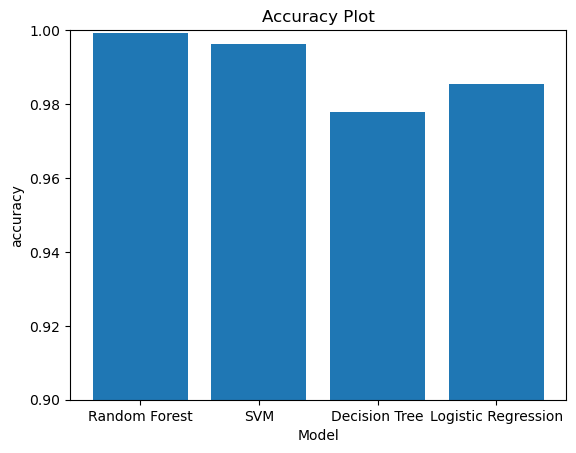

In [87]:
#ACCURACY GRAPH
values = [accuracy1, accuracy2, accuracy3, accuracy4]
labels = ['Random Forest', 'SVM', 'Decision Tree', 'Logistic Regression']

# Plotting
plt.bar(labels, values)
plt.ylim(0.9,1.0)
plt.xlabel('Model')
plt.ylabel('accuracy')
plt.title('Accuracy Plot')
plt.show()

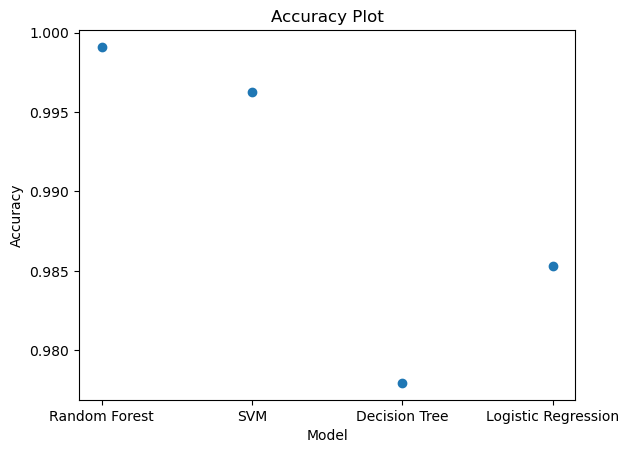

In [88]:
plt.scatter(range(len(values)), values)
plt.xticks(range(len(values)), labels)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot')
plt.show()

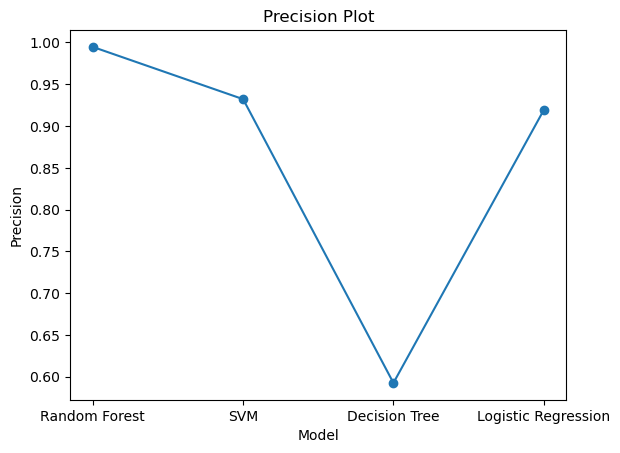

In [89]:
#precision graph
values2 = [precision1, precision2, precision3, precision4]
labels = ['Random Forest', 'SVM', 'Decision Tree', 'Logistic Regression']

# Plotting
plt.plot(labels, values2, marker='o')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision Plot')
plt.show()

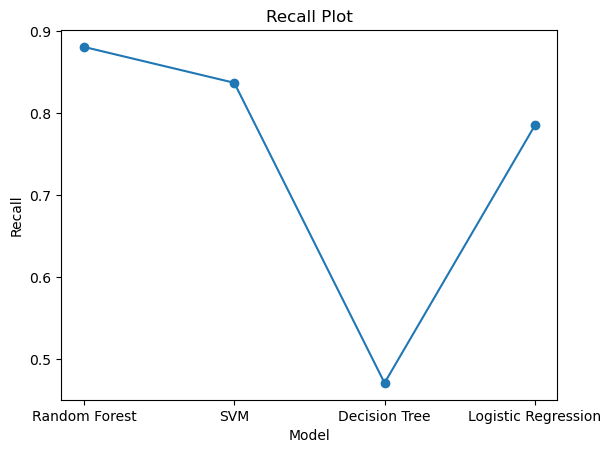

In [90]:
#Recall Graph
values3 = [recall1, recall2, recall3, recall4]
labels = ['Random Forest', 'SVM', 'Decision Tree', 'Logistic Regression']


plt.plot(labels, values3, marker='o')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall Plot')
plt.show()


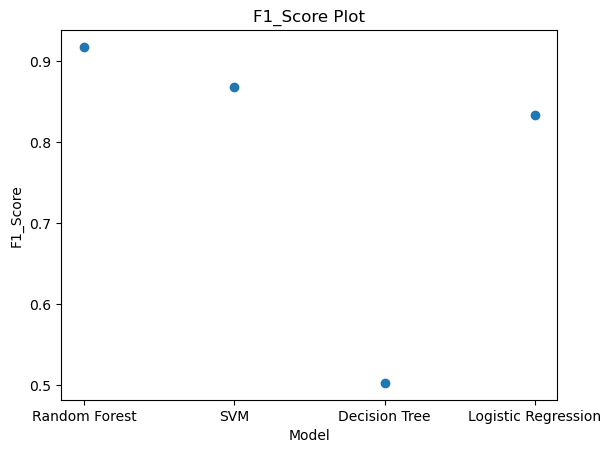

In [91]:
#F1_Score Graph
values4 = [f11, f12, f13, f14]
labels = ['Random Forest', 'SVM', 'Decision Tree', 'Logistic Regression']


plt.scatter(range(len(values)), values4)
plt.xticks(range(len(values)), labels)
plt.xlabel('Model')
plt.ylabel('F1_Score')
plt.title('F1_Score Plot')
plt.show()

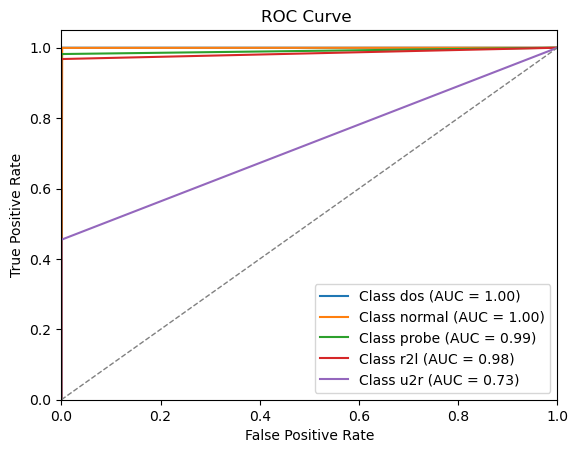

In [92]:
#ROC-AUC curve for RandomForest Algorithm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Find the unique classes in the true labels
unique_classes = np.unique(Y_test)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for cls in unique_classes:
    # Assign positive class as 1 and negative class as 0
    class_true_labels = (Y_test == cls).astype(int)
    class_predicted_values = (Y_test_pred1 == cls).astype(int)

    # Compute the ROC curve for the current class
    fpr[cls], tpr[cls], _ = roc_curve(class_true_labels, class_predicted_values)
    roc_auc[cls] = auc(fpr[cls], tpr[cls])

# Plot the ROC curve for each class
plt.figure()

for cls in unique_classes:
    plt.plot(fpr[cls], tpr[cls], label='Class {} (AUC = {:.2f})'.format(cls, roc_auc[cls]))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve ')
plt.legend(loc="lower right")
plt.show()

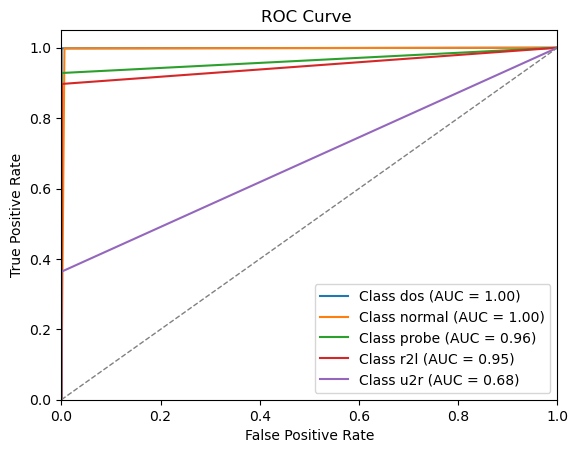

In [93]:
#ROC-AUC curve for SVM Algorithm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Find the unique classes in the true labels
unique_classes = np.unique(Y_test)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for cls in unique_classes:
    # Assign positive class as 1 and negative class as 0
    class_true_labels = (Y_test == cls).astype(int)
    class_predicted_values = (Y_test_pred2 == cls).astype(int)

    # Compute the ROC curve for the current class
    fpr[cls], tpr[cls], _ = roc_curve(class_true_labels, class_predicted_values)
    roc_auc[cls] = auc(fpr[cls], tpr[cls])

# Plot the ROC curve for each class
plt.figure()

for cls in unique_classes:
    plt.plot(fpr[cls], tpr[cls], label='Class {} (AUC = {:.2f})'.format(cls, roc_auc[cls]))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve ')
plt.legend(loc="lower right")
plt.show()

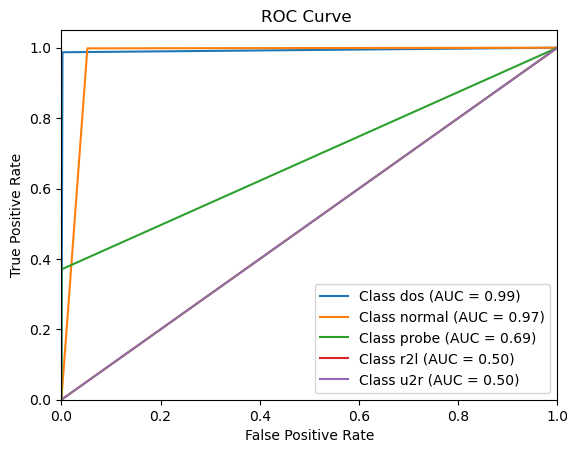

In [94]:
#ROC-AUC curve for Decision Tree Algorithm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Find the unique classes in the true labels
unique_classes = np.unique(Y_test)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for cls in unique_classes:
    # Assign positive class as 1 and negative class as 0
    class_true_labels = (Y_test == cls).astype(int)
    class_predicted_values = (Y_test_pred3 == cls).astype(int)

    # Compute the ROC curve for the current class
    fpr[cls], tpr[cls], _ = roc_curve(class_true_labels, class_predicted_values)
    roc_auc[cls] = auc(fpr[cls], tpr[cls])

# Plot the ROC curve for each class
plt.figure()

for cls in unique_classes:
    plt.plot(fpr[cls], tpr[cls], label='Class {} (AUC = {:.2f})'.format(cls, roc_auc[cls]))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve ')
plt.legend(loc="lower right")
plt.show()

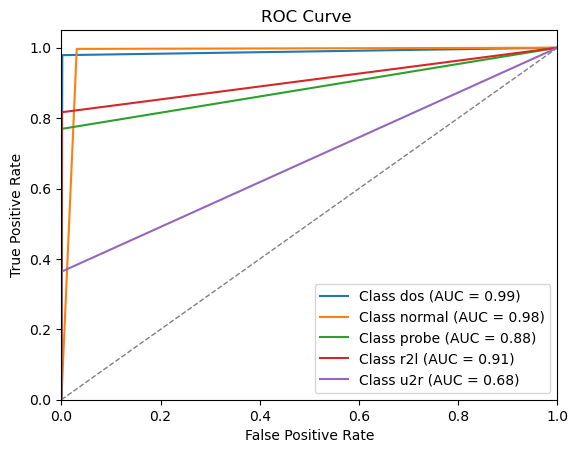

In [95]:
#ROC-AUC curve for Logistic Regression Algorithm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Find the unique classes in the true labels
unique_classes = np.unique(Y_test)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for cls in unique_classes:
    # Assign positive class as 1 and negative class as 0
    class_true_labels = (Y_test == cls).astype(int)
    class_predicted_values = (Y_test_pred4 == cls).astype(int)

    # Compute the ROC curve for the current class
    fpr[cls], tpr[cls], _ = roc_curve(class_true_labels, class_predicted_values)
    roc_auc[cls] = auc(fpr[cls], tpr[cls])

# Plot the ROC curve for each class
plt.figure()

for cls in unique_classes:
    plt.plot(fpr[cls], tpr[cls], label='Class {} (AUC = {:.2f})'.format(cls, roc_auc[cls]))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve ')
plt.legend(loc="lower right")
plt.show()

#            Model -5 SVM algorithm  using linear kernel

In [96]:
from sklearn.svm import SVC
model5 = SVC(kernel='linear')


In [97]:
# Training
start_time = time.time()
model5.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time - start_time)

Training time:  42.3674955368042


In [98]:
# Testing
start_time = time.time()
Y_test_pred5 = model5.predict(X_test)
end_time = time.time()
print("Testing time: ", end_time - start_time)

Testing time:  6.971768379211426


In [99]:
# Evaluation
train_score = model5.score(X_train, Y_train)
test_score = model5.score(X_test, Y_test)
print("Train score is:", train_score)
print("Test score is:", test_score)

Train score is: 0.9876360952205204
Test score is: 0.9871992340354675


In [100]:
#evaluation Metrics
#Confusion Matrix
confusion_mat=confusion_matrix(Y_test, Y_test_pred5)
print("Confusion Matrix: ")
print(confusion_mat)
print()

# Calculate accuracy
accuracy5 = accuracy_score(Y_test, Y_test_pred5)
print("Accuracy:", accuracy5)
print()

# Calculate precision
precision5= precision_score(Y_test, Y_test_pred5, average='macro')
print("Precision:", precision5)
print()

# Calculate recall
recall5 = recall_score(Y_test, Y_test_pred5, average='macro')
print("Recall:", recall5)
print()

# Calculate F1 score
f15 = f1_score(Y_test, Y_test_pred5, average='macro')
print("F1 Score:", f15)

Confusion Matrix: 
[[17626   309     3     0     0]
 [   42 28971     3    43     1]
 [    7   146   571     0     0]
 [    0    52     2   257     0]
 [    2     1     0     4     4]]

Accuracy: 0.9871992340354675

Precision: 0.922292019981475

Recall: 0.7916442167667589

F1 Score: 0.8383641361334815


# Model-6 SVM Algorithm using Polynomial Kernel

In [101]:
from sklearn.svm import SVC
model6 = SVC(kernel='poly', degree=3)


In [102]:
# Training
start_time = time.time()
model6.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time - start_time)

Training time:  19.43997287750244


In [103]:
# Testing
start_time = time.time()
Y_test_pred6 = model6.predict(X_test)
end_time = time.time()
print("Testing time: ", end_time - start_time)

Testing time:  4.915551662445068


In [104]:
# Evaluation
train_score = model6.score(X_train, Y_train)
test_score = model6.score(X_test, Y_test)
print("Train score is:", train_score)
print("Test score is:", test_score)

Train score is: 0.996514322035636
Test score is: 0.9967113479310632


In [105]:
#evaluation Metrics
#Confusion Matrix
confusion_mat=confusion_matrix(Y_test, Y_test_pred6)
print("Confusion Matrix: ")
print(confusion_mat)
print()

# Calculate accuracy
accuracy6 = accuracy_score(Y_test, Y_test_pred6)
print("Accuracy:", accuracy6)
print()

# Calculate precision
precision6= precision_score(Y_test, Y_test_pred6, average='macro')
print("Precision:", precision6)
print()

# Calculate recall
recall6 = recall_score(Y_test, Y_test_pred6, average='macro')
print("Recall:", recall6)
print()

# Calculate F1 score
f16 = f1_score(Y_test, Y_test_pred6, average='macro')
print("F1 Score:", f16)

Confusion Matrix: 
[[17930     8     0     0     0]
 [   14 29008     6    31     1]
 [    2    54   668     0     0]
 [    1    34     0   276     0]
 [    0     3     0     4     4]]

Accuracy: 0.9967113479310632

Precision: 0.9348418505429222

Recall: 0.8343025445146631

F1 Score: 0.8679636186787955


# Model-7 SVM Algorithm Using Sigmoid Kernel


In [106]:
from sklearn.svm import SVC
model7 = SVC(kernel='sigmoid')


In [107]:
# Training
start_time = time.time()
model7.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time - start_time)

Training time:  498.2324140071869


In [108]:
# Testing
start_time = time.time()
Y_test_pred7 = model7.predict(X_test)
end_time = time.time()
print("Testing time: ", end_time - start_time)


Testing time:  54.128063678741455


In [109]:
# Evaluation
train_score = model7.score(X_train, Y_train)
test_score = model7.score(X_test, Y_test)
print("Train score is:", train_score)
print("Test score is:", test_score)

Train score is: 0.9379754362223452
Test score is: 0.9357047706269254


In [110]:
#evaluation Metrics
#Confusion Matrix
confusion_mat=confusion_matrix(Y_test, Y_test_pred7)
print("Confusion Matrix: ")
print(confusion_mat)
print()

# Calculate accuracy
accuracy7 = accuracy_score(Y_test, Y_test_pred7)
print("Accuracy:", accuracy7)
print()

# Calculate precision
precision7= precision_score(Y_test, Y_test_pred7, average='macro')
print("Precision:", precision7)
print()

# Calculate recall
recall7 = recall_score(Y_test, Y_test_pred7, average='macro')
print("Recall:", recall7)
print()

# Calculate F1 score
f17 = f1_score(Y_test, Y_test_pred7, average='macro')
print("F1 Score:", f17)

Confusion Matrix: 
[[17101   695   105    37     0]
 [  493 27757   667   143     0]
 [  211   427    86     0     0]
 [   19   282     0    10     0]
 [    0    10     0     0     1]]

Accuracy: 0.9357047706269254

Precision: 0.6127657190791107

Recall: 0.430069795243183

F1 Score: 0.44500584883429806


# Comparision of different types of Kernels

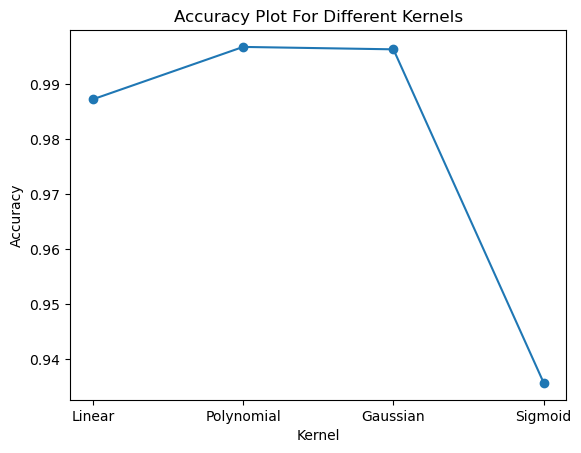

In [111]:
values2 = [accuracy5, accuracy6, accuracy2, accuracy7]
labels = ['Linear', 'Polynomial', 'Gaussian', 'Sigmoid']

# Plotting
plt.plot(labels, values2, marker='o')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot For Different Kernels')
plt.show()

# Ensemble Learning
# Voting

In [112]:
from sklearn.ensemble import VotingClassifier


In [113]:
voting = VotingClassifier(estimators=[('Random Forest', model1), ('SVM', model2), ('Decision Tree', model3), ('Logistic Regression', model4)],voting='hard')

In [114]:
voting.fit(X_train, Y_train['Attack Type'].values)


VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(n_estimators=30)),
                             ('SVM', SVC()),
                             ('Decision Tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=4)),
                             ('Logistic Regression',
                              LogisticRegression(max_iter=1000,
                                                 multi_class='multinomial'))])

In [115]:
y_pred8 = voting.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred8))
print("Precision (Macro)", precision_score(Y_test, y_pred8, average='macro'))
print("F1-score (Macro)", f1_score(Y_test, y_pred8, average='macro'))


Accuracy 0.9951710931645991
Precision (Macro) 0.9941878141741544
F1-score (Macro) 0.8603571731788001


# Ensemble Learning-Stacking

In [116]:
from sklearn.ensemble import StackingClassifier


In [117]:
base_classifiers = [
                    ('SVM', model2),
                    ('DecisionTree', model3),
                    ('Logistic Regression', model4)]

In [118]:
meta_classifier = model1

In [119]:
stacking_classifier = StackingClassifier(estimators=base_classifiers,
                                         final_estimator=meta_classifier,
                                         stack_method='predict',  
                                         cv=5)

In [120]:
stacking_classifier.fit(X_train, Y_train['Attack Type'].values)


StackingClassifier(cv=5,
                   estimators=[('SVM', SVC()),
                               ('DecisionTree',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=4)),
                               ('Logistic Regression',
                                LogisticRegression(max_iter=1000,
                                                   multi_class='multinomial'))],
                   final_estimator=RandomForestClassifier(n_estimators=30),
                   stack_method='predict')

In [121]:
y_pred9 = voting.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred9))
print("Precision (Macro)", precision_score(Y_test, y_pred9, average='macro'))
print("F1-score (Macro)", f1_score(Y_test, y_pred9, average='macro'))

Accuracy 0.9951710931645991
Precision (Macro) 0.9941878141741544
F1-score (Macro) 0.8603571731788001


# Ensemble Learnig-Bagging

In [122]:
from sklearn.ensemble import BaggingClassifier


In [123]:
bagging_classifier = BaggingClassifier(estimator=model1,
                                       n_estimators=50,  
                                       random_state=123)

In [124]:
bagging_classifier.fit(X_train, Y_train['Attack Type'].values)


BaggingClassifier(estimator=RandomForestClassifier(n_estimators=30),
                  n_estimators=50, random_state=123)

In [125]:
y_pred10 = voting.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred10))
print("Precision (Macro)", precision_score(Y_test, y_pred10, average='macro'))
print("F1-score (Macro)", f1_score(Y_test, y_pred10, average='macro'))

Accuracy 0.9951710931645991
Precision (Macro) 0.9941878141741544
F1-score (Macro) 0.8603571731788001


# Ensemble Learning[Voting]-[SVM,ExtraTree]


In [126]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

In [127]:
svm_classifier = SVC(kernel='rbf', probability=True, random_state=42)
extra_tree_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)


In [128]:
voting_classifier = VotingClassifier(estimators=[('svm', svm_classifier), ('extra_tree', extra_tree_classifier)], voting='hard')


In [129]:

voting_classifier.fit(X_train, Y_train['Attack Type'].values)


VotingClassifier(estimators=[('svm', SVC(probability=True, random_state=42)),
                             ('extra_tree',
                              ExtraTreesClassifier(random_state=42))])

In [130]:
predictions = voting_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print("Ensemble accuracy:", accuracy)

Ensemble accuracy: 0.9975022895678961


# Voting with Hyperparameter Tuning[svm,extratree]

In [131]:
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

In [132]:
svm_classifier = SVC(kernel='rbf', C=50, gamma=1, probability=True, random_state=42)
extra_tree_classifier = ExtraTreesClassifier(n_estimators=99, random_state=42)


In [133]:
voting_classifier = VotingClassifier(estimators=[('svm', svm_classifier), ('extra_tree', extra_tree_classifier)], voting='hard')


In [134]:
voting_classifier.fit(X_train, Y_train['Attack Type'].values)


VotingClassifier(estimators=[('svm',
                              SVC(C=50, gamma=1, probability=True,
                                  random_state=42)),
                             ('extra_tree',
                              ExtraTreesClassifier(n_estimators=99,
                                                   random_state=42))])

In [135]:
predictions = voting_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print("Ensemble accuracy:", accuracy)

Ensemble accuracy: 0.998293231204729


# Voting on Random forest and svm,extratree

In [136]:
voting_classifier = VotingClassifier(estimators=[('svm', svm_classifier), ('extra_tree', extra_tree_classifier),('Random Forest',model1)], voting='hard')


In [137]:
voting_classifier.fit(X_train, Y_train['Attack Type'].values)


VotingClassifier(estimators=[('svm',
                              SVC(C=50, gamma=1, probability=True,
                                  random_state=42)),
                             ('extra_tree',
                              ExtraTreesClassifier(n_estimators=99,
                                                   random_state=42)),
                             ('Random Forest',
                              RandomForestClassifier(n_estimators=30))])

In [138]:
predictions = voting_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print("Ensemble accuracy:", accuracy)

Ensemble accuracy: 0.9989592873199568


# Apply XAI  (required  Install SHAP or LIME)   
SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations)

In [139]:
!pip install shap lime

# SHAP provides global and local explanations for your model's predictions

#  Use LIME for Local Interpretability

In [152]:
import pandas as pd 
#for i in range(len(X_test)):
i = 8
test_instance_df = pd.DataFrame([X_test[i]], columns=df.columns[:-1]) 
test_instance_df.head()


,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0.117574,1.0,0.0,2.120063e-07,0.00002,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.015686,0.51,0.92,0.0


In [153]:
from lime.lime_tabular import LimeTabularExplainer

# Create LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train,
    feature_names=df.columns[:-1],
    class_names=Y_train['Attack Type'].unique(),
    mode="classification"
)

# Explain a prediction
explanation = explainer.explain_instance(X_test[0], model1.predict_proba, num_features=10)
explanation.show_in_notebook()


# Apply SHAP for Explaining Random Forest Predictions

In [ ]:
# import shap

# # Initialize the SHAP explainer for the Random Forest model
# explainer = shap.TreeExplainer(model1)

# # Compute SHAP values for the test data
# shap_values = explainer.shap_values(X_test)

# # Check if the model is multi-class
# if isinstance(shap_values, list):
#     # Multi-class models have one SHAP value array per class
#     num_classes = len(shap_values)
#     class_index = 0  # You can adjust this index to visualize other classes

#     # Visualize SHAP values for the first test instance and the selected class
#     shap.force_plot(
#         explainer.expected_value[class_index],  # Base value for the selected class
#         shap_values[class_index][0],           # SHAP values for the first instance
#         X_test[0, :],                          # Features of the first instance
#         feature_names=df.columns[:-1],         # Feature names
#         matplotlib=True                        # Render the plot using Matplotlib
#     )
    
#     # Summary plot for global feature importance
#     shap.summary_plot(
#         shap_values[class_index],
#         X_test,
#         feature_names=df.columns[:-1]
#     )
# else:
#     # For binary classification or regression, shap_values is a single array
#     shap.force_plot(
#         explainer.expected_value,              # Base value for the model
#         shap_values[0],                        # SHAP values for the first instance
#         X_test[0, :],                          # Features of the first instance
#         feature_names=df.columns[:-1],
#         matplotlib=True                        # Render the plot using Matplotlib
#     )
    
#     # Summary plot for global feature importance
#     shap.summary_plot(
#         shap_values,
#         X_test,
#         feature_names=df.columns[:-1]
#     )



In [ ]:
# # Force Plot for a single prediction
# shap.force_plot(
#     base_value=explainer.expected_value,  # Base value for the model
#     shap_values=shap_values[0],          # SHAP values for the first instance
#     features=X_test[0, :],               # Input features for the first instance
#     feature_names=df.columns[:-1]        # Feature names
# )

# # Summary Plot for global feature importance
# shap.summary_plot(shap_values, X_test, feature_names=df.columns[:-1])
